# Predict Customer Clicked Ads Classification by Using Machine Learning

In [521]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [522]:
# load dataset
df = pd.read_csv(r'D:\Rakamin Data Science\Job Acceleration Program\Mini Project 4 - Predict Customer Clicked Ads\Clicked Ads Dataset.csv')
df.head()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


## EDA

In [523]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   Daily Time Spent on Site  987 non-null    float64
 2   Age                       1000 non-null   int64  
 3   Area Income               987 non-null    float64
 4   Daily Internet Usage      989 non-null    float64
 5   Male                      997 non-null    object 
 6   Timestamp                 1000 non-null   object 
 7   Clicked on Ad             1000 non-null   object 
 8   city                      1000 non-null   object 
 9   province                  1000 non-null   object 
 10  category                  1000 non-null   object 
dtypes: float64(3), int64(2), object(6)
memory usage: 86.1+ KB


In [524]:
# descriptive statistics numerical dan categorical
df.describe()

,Unnamed: 0,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage
count,1000.000000,987.000000,1000.000000,9.870000e+02,989.000000
mean,499.500000,64.929524,36.009000,3.848647e+08,179.863620
std,288.819436,15.844699,8.785562,9.407999e+07,43.870142
min,0.000000,32.600000,19.000000,9.797550e+07,104.780000
25%,249.750000,51.270000,29.000000,3.286330e+08,138.710000
50%,499.500000,68.110000,35.000000,3.990683e+08,182.650000
75%,749.250000,78.460000,42.000000,4.583554e+08,218.790000
max,999.000000,91.430000,61.000000,5.563936e+08,267.010000


In [525]:
df.select_dtypes(include='object').describe()

,Male,Timestamp,Clicked on Ad,city,province,category
count,997,1000,1000,1000,1000,1000
unique,2,997,2,30,16,10
top,Perempuan,5/26/2016 15:40,No,Surabaya,Daerah Khusus Ibukota Jakarta,Otomotif
freq,518,2,500,64,253,112


In [526]:
# cek data duplikat
df.duplicated().sum()

0

In [527]:
# cek missing value
mv = df.isnull().sum()
tmv = df.isnull().count()

pmv = mv*100/tmv

mdf = pd.concat([mv,pmv], axis=1)
mdf.columns=['Missing Value Total', 'Missing Value Percentage (%)']
mdf

,Missing Value Total,Missing Value Percentage (%)
Unnamed: 0,0,0.0
Daily Time Spent on Site,13,1.3
Age,0,0.0
Area Income,13,1.3
Daily Internet Usage,11,1.1
Male,3,0.3
Timestamp,0,0.0
Clicked on Ad,0,0.0
city,0,0.0
province,0,0.0


**HASIL OBSERVASI**

Berdasarkan output di atas, dapat disimpulkan bahwa:

- Terdapat 4 kolom yang memiliki missing value, yaitu kolom `Daily Time Spent on Site`, `Area Income`, `Daily Internet Usage`, dan `Male`. Kolom-kolom tersebut memiliki missing value < 10% sehingga dapat dikategorikan masih relatif aman.

- Terdapat sedikit perbedaan nilai mean dan median pada beberapa fitur. Hal ini mengindikasikan distribusi skewed, namun tidak signifikan.

### Univariate Analysis

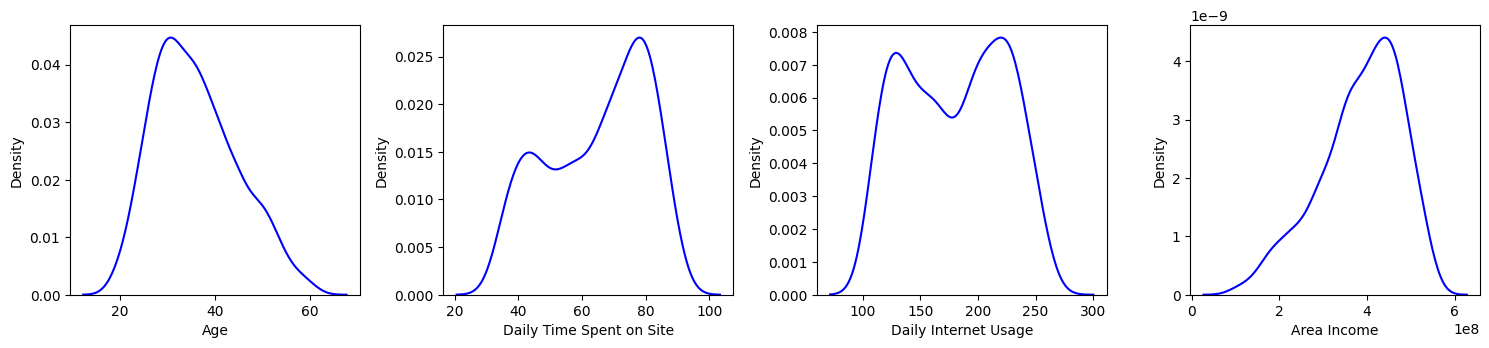

In [528]:
# kolom numerical
num = ['Age','Daily Time Spent on Site','Daily Internet Usage','Area Income']

# buat histogram
features = num
plt.figure(figsize=(15, 13))
for i in range(0, len(num)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=df[features[i]], color='blue')
    plt.xlabel(features[i])
    plt.tight_layout()

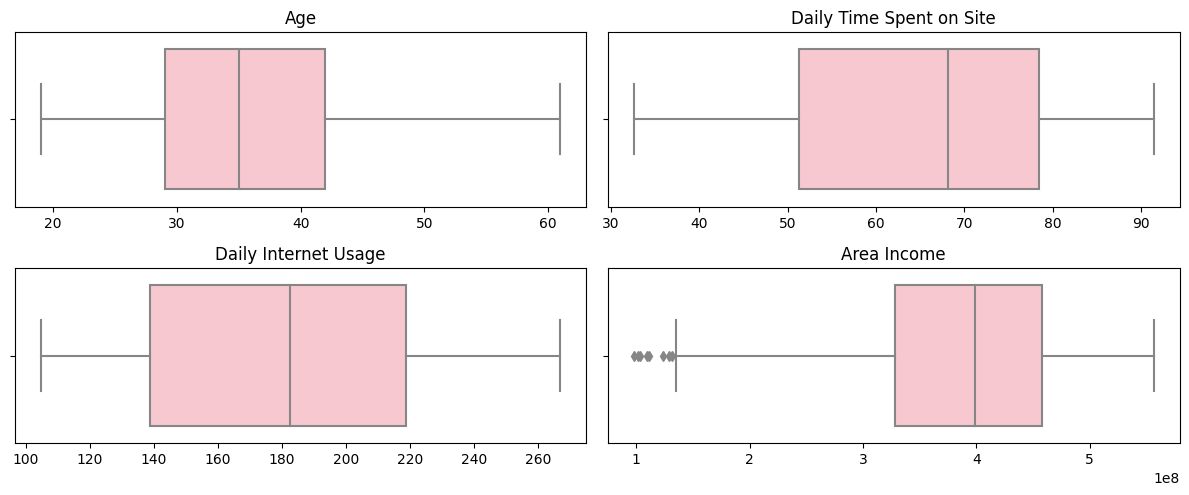

In [529]:
# buat boxplot
plt.figure(figsize=(12,7))
for i in range(len(num)):
    plt.subplot(3,2,i+1)
    sns.boxplot(data=df, x=num[i], color='pink')
    plt.title(f'{num[i]}')
    plt.xlabel('')
plt.tight_layout()

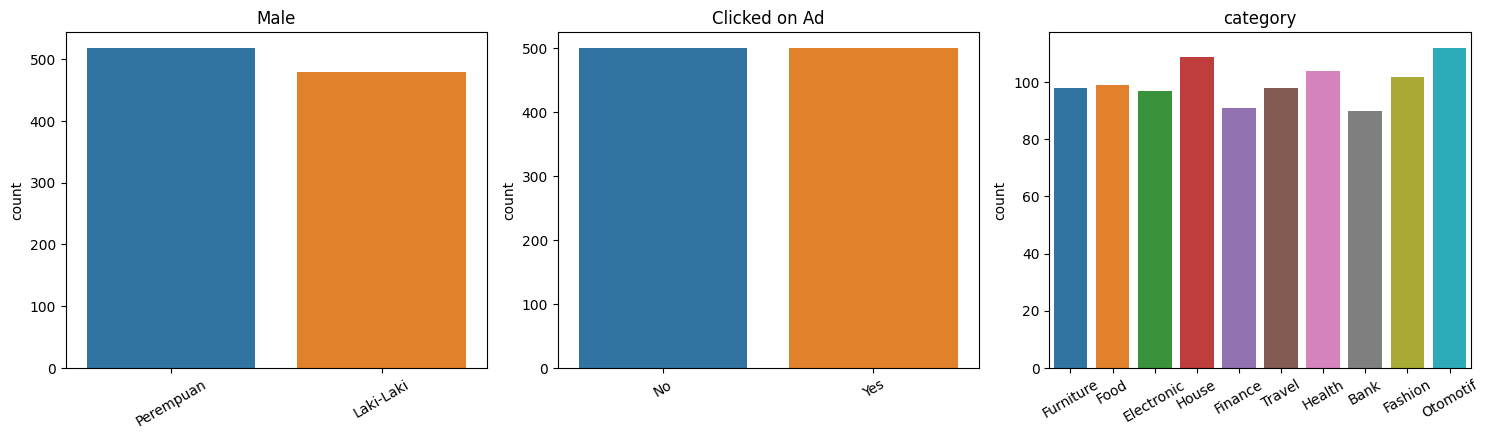

In [530]:
# kolom categorical
cat = df[['Male','Clicked on Ad','category']]

plt.figure(figsize=(15,8))
for i in range(len(cat.columns)):
    plt.subplot(2,3,i+1)
    sns.countplot(x=cat.columns[i], data=df)
    plt.title(cat.columns[i])
    plt.tight_layout()
    plt.xlabel('')
    plt.xticks(rotation=30)

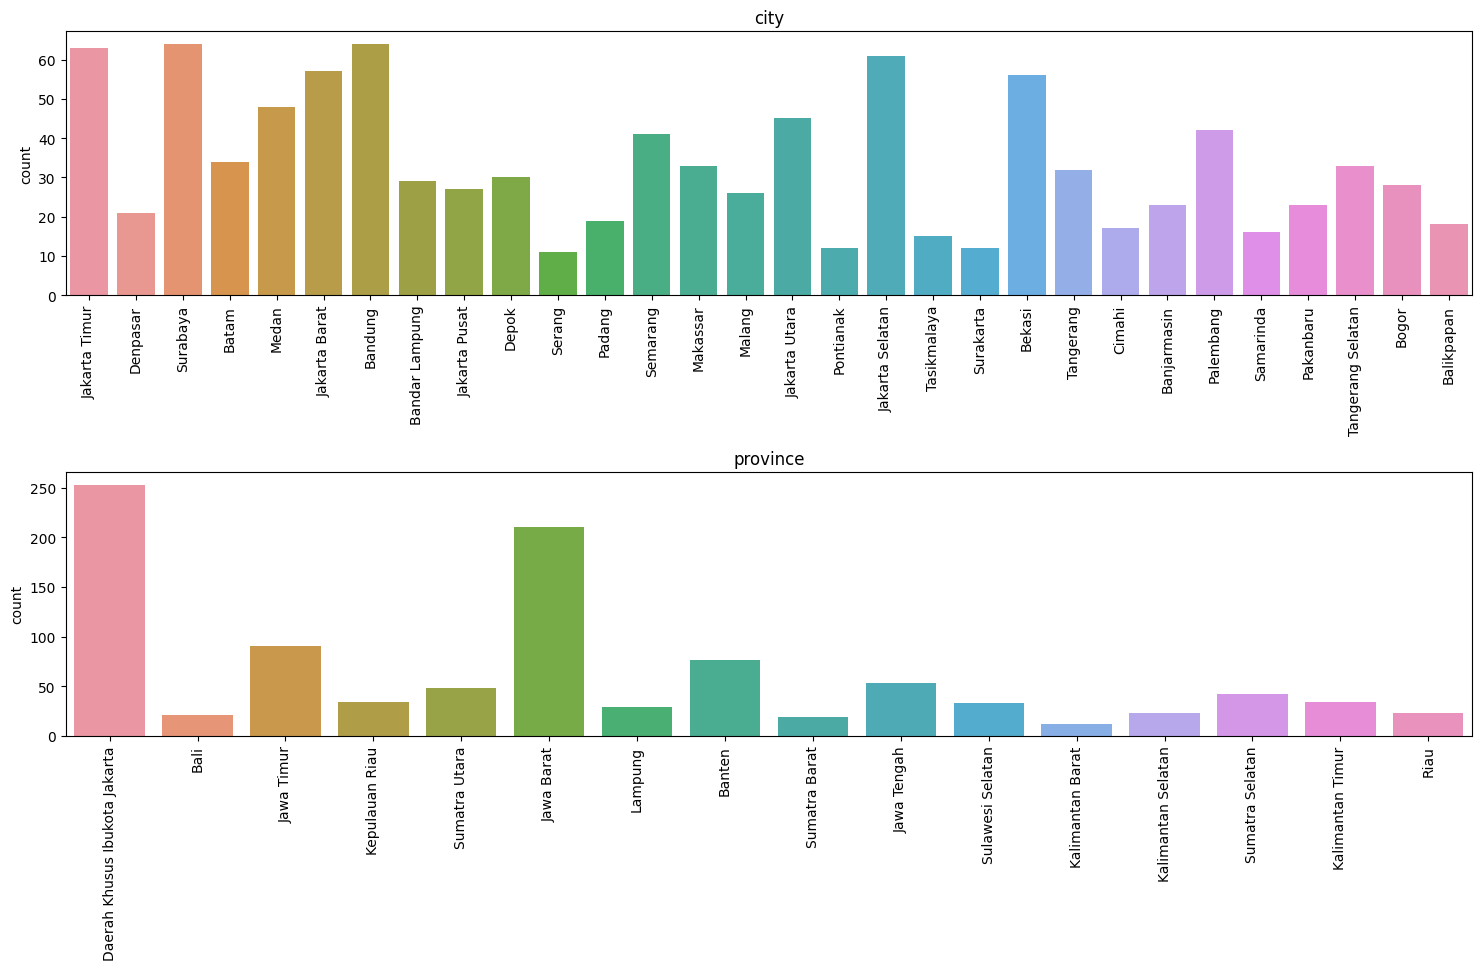

In [531]:
# kolom location
loc = df[['city','province']]

plt.figure(figsize=(15,8))
for i in range(len(loc.columns)):
    plt.subplot(2,1,i+1)
    sns.countplot(x=loc.columns[i], data=df)
    plt.title(loc.columns[i])
    plt.tight_layout()
    plt.xlabel('')
    plt.xticks(rotation=90)

**HASIL OBSERVASI**

Berdasarkan output di atas, dapat disimpulkan bahwa:

- Kolom-kolom numerical memiliki distribusi skewed, namun tidak signifikan, sehingga dapat dikategorikan mendekati normal.
- Terdapat outlier pada `Area Income`.
- Tidak ada perbedaan yang signifikan antara jumlah customer yang mengklik ads dan yang tidak.
- Mayoritas customer berasal dari provinsi Jawa Barat dan DKI Jakarta.

### Bivariate Analysis

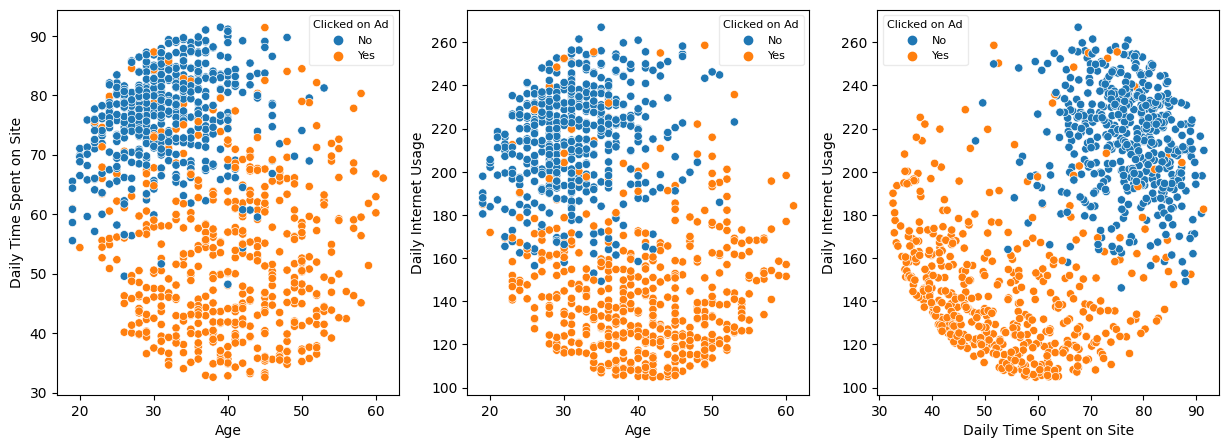

In [532]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.scatterplot(data=df, x='Age', y='Daily Time Spent on Site', hue='Clicked on Ad')
plt.legend(title='Clicked on Ad', loc='upper right',framealpha=0.4, fontsize=8,title_fontsize=8)

plt.subplot(1,3,2)
sns.scatterplot(data=df, x='Age', y='Daily Internet Usage', hue='Clicked on Ad')
plt.legend(title='Clicked on Ad', loc='upper right',framealpha=0.4, fontsize=8,title_fontsize=8)

plt.subplot(1,3,3)
sns.scatterplot(data=df, x='Daily Time Spent on Site', y='Daily Internet Usage', hue='Clicked on Ad')
plt.legend(title='Clicked on Ad', loc='upper left',framealpha=0.4, fontsize=8,title_fontsize=8)

**HASIL OBSERVASI**

Berdasarkan output di atas, dapat disimpulkan bahwa:

- Mayoritas customer yang tidak mengklik ads adalah customer berumur 20-40 tahun yang telah mengakses website dalam waktu yang lama per harinya (60-90 menit).
- Mayoritas customer yang mengklik ads adalah customer dengan umur 30-50 tahun dengan waktu akses yang lebih sedikit (30-50 menit).
- Mayoritas customer yang mengklik ads adalah customer yang menggunakan internet harian di bawah 180 menit.
- Customer yang penggunaan internet hariannya lebih sedikit, juga mengakses website dalam waktu yang lebih singkat.



### Multivariate Analysis

<Figure size 2000x2000 with 0 Axes>

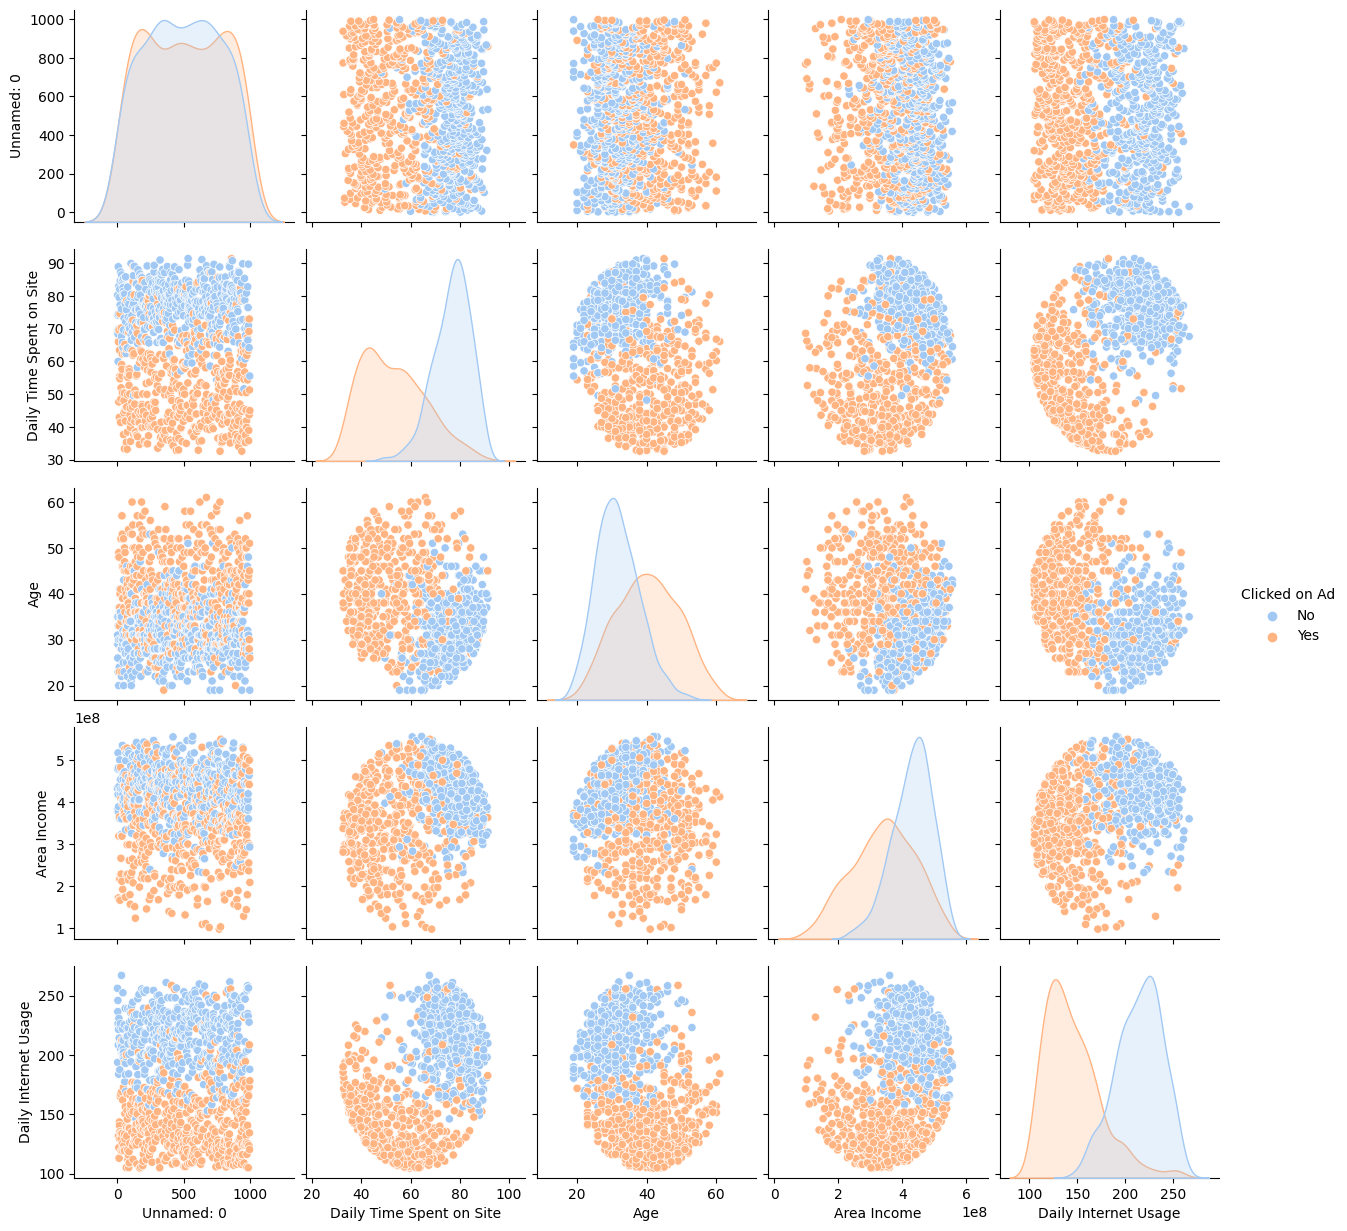

In [533]:
plt.figure(figsize=(20,20))
sns.pairplot(df, hue='Clicked on Ad', palette='pastel')
plt.show()

<Axes: >

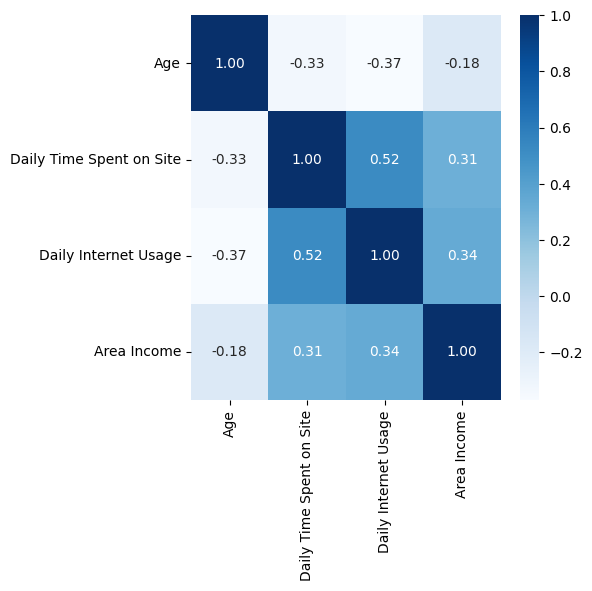

In [60]:
corr = df[num].corr()
plt.figure(figsize=(5, 5))
sns.heatmap(df[num].corr(), cmap='Blues', annot=True, fmt='.2f')

**HASIL OBSERVASI**

Berdasarkan output di atas, dapat disimpulkan bahwa:

- Kolom `Daily Time Spent on Site` dengan kolom `Daily Internet Usage` memiliki korelasi paling tinggi.
- Kolom `Age` memiliki korelasi negatif dengan kolom `Daily Time Spent on Site`, `Daily Internet Usage`, dan `Area Income`.

## Data Cleaning & Data Pre-Processing

In [142]:
df_clean = df.copy()

In [143]:
# ubah nama kolom Male ke Gender
df_clean.rename(columns={'Male': 'Gender'}, inplace=True)

In [144]:
# hapus kolom Unnamed
df_clean.drop('Unnamed: 0', axis = 1, inplace = True)

In [145]:
# hapus missing value
df_clean = df_clean.dropna(axis=0)
print('Jumlah baris dan kolom setelah menghapus missing value: ', df_clean.shape)

Jumlah baris dan kolom setelah menghapus missing value:  (963, 10)


In [146]:
# ubah tipe data Timestamp ke datetime
df_clean['Timestamp'] = pd.to_datetime(df_clean['Timestamp'])
df_clean.sample(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category
956,35.66,36,414681680.0,172.57,Perempuan,2016-02-21 20:09:00,Yes,Jakarta Selatan,Daerah Khusus Ibukota Jakarta,Food
647,46.43,28,377457010.0,137.20,Laki-Laki,2016-04-25 03:18:00,Yes,Banjarmasin,Kalimantan Selatan,Furniture
640,64.63,45,109188030.0,158.80,Laki-Laki,2016-06-12 03:11:00,Yes,Jakarta Barat,Daerah Khusus Ibukota Jakarta,Health


### Feature Extraction

In [147]:
# extract Timestamp data
df_clean['Year'] = df_clean['Timestamp'].dt.year
df_clean['Month'] = df_clean['Timestamp'].dt.month
df_clean['Day'] = df_clean['Timestamp'].dt.day
df_clean['Hour'] = df_clean['Timestamp'].dt.hour

In [148]:
# extract time
def extract_time(value):
    if value >=0 and value <=6: # Subuh
        return 1
    elif value >=6 and value <=12: # Pagi
        return 2
    elif value >=13 and value <=18: # Siang
        return 3
    elif value >=19 and value <=23: # Malam
        return 4
df_clean['Time'] = df_clean['Hour'].apply(lambda value: extract_time(value))

### Feature Encoding

In [149]:
# encoding kolom Gender
df_clean['Gender'] = np.where(df_clean['Gender']=='Laki-Laki', 1, 0)

# encoding kolom Clicked on Ad
df_clean['Clicked on Ad'] = np.where(df_clean['Clicked on Ad']=='Yes', 1, 0)

In [150]:
df_clean.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Gender,Timestamp,Clicked on Ad,city,province,category,Year,Month,Day,Hour,Time
0,68.95,35,432837300.0,256.09,0,2016-03-27 00:53:00,0,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture,2016,3,27,0,1
1,80.23,31,479092950.0,193.77,1,2016-04-04 01:39:00,0,Denpasar,Bali,Food,2016,4,4,1,1
2,69.47,26,418501580.0,236.50,0,2016-03-13 20:35:00,0,Surabaya,Jawa Timur,Electronic,2016,3,13,20,4


### Feature Selection

<Axes: >

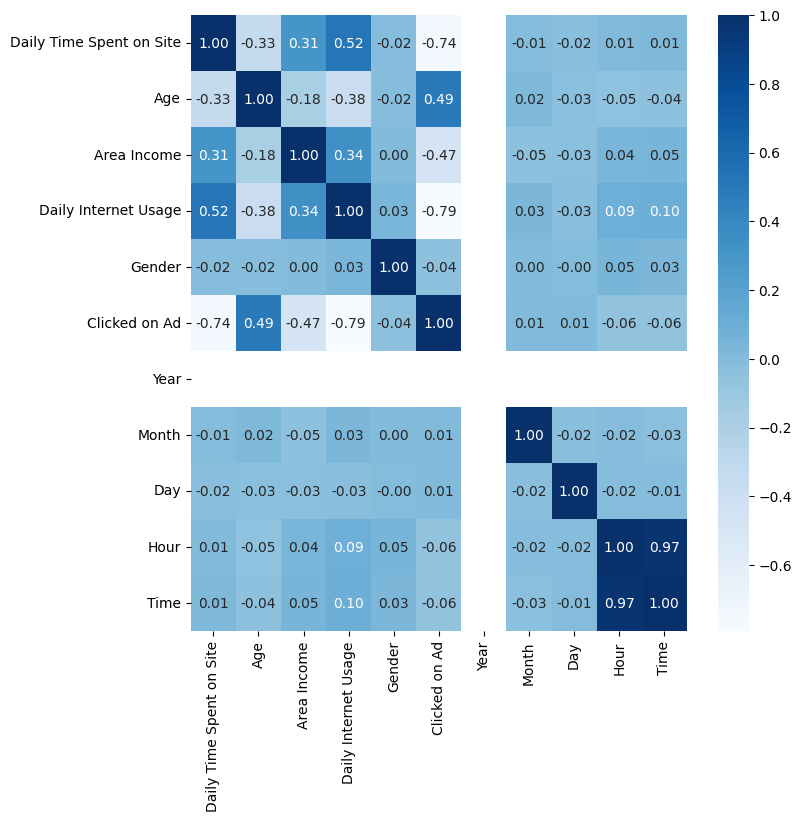

In [151]:
plt.figure(figsize=(8, 8))
sns.heatmap(df_clean.corr(), cmap='Blues', annot=True, fmt='.2f')

In [294]:
# memilih fitur
df_select = df_clean[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Clicked on Ad','Time']]
df_select.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Clicked on Ad,Time
0,68.95,35,432837300.0,256.09,0,1
1,80.23,31,479092950.0,193.77,0,1
2,69.47,26,418501580.0,236.50,0,4


### Split Data

In [295]:
X = df_select.drop(['Clicked on Ad'], axis=1)
y = df_select[['Clicked on Ad']]

In [402]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

print('Jumlah baris dan kolom X_train :', X_train.shape)
print('Jumlah baris dan kolom X_test :', X_test.shape)
print('Jumlah baris dan kolom y_train :', y_train.shape)
print('Jumlah baris dan kolom y_test :', y_test.shape)

Jumlah baris dan kolom X_train : (674, 5)
Jumlah baris dan kolom X_test : (289, 5)
Jumlah baris dan kolom y_train : (674, 1)
Jumlah baris dan kolom y_test : (289, 1)


## Modeling

### 1. Sebelum Standarisasi

In [403]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

def print_score(model):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1: {f1}')
    print(f'ROC_AUC: {roc_auc}')

def show_feature_importance(model):
    feature_imp = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    plt.figure(figsize=(10,8))
    sns.barplot(x=feature_imp, y=feature_imp.index)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

def show_best_hyperparameters(model):
    print('Best Parameters: ', model.best_params_)

def eval_model(model, X_train, y_train, X_test, y_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    accuracy = round(accuracy_score(y_test, y_pred), 2)
    accuracy_train = round(accuracy_score(y_train, y_pred_train), 2)
    return accuracy, accuracy_train

def score_all_clasifiers(model_list, X_train, y_train, X_test, y_test):
    model_name = ["Logistic Regression", "Decision Tree", "Random Forest", "AdaBoost", "XGBoost"]
    eval_cols = ['Model','Accuracy (Test)','Accuracy (Train)']
    eval_list = []

    for name, model in zip(model_name, model_list):
        result = eval_model(model, X_train, y_train, X_test, y_test)
        eval_list.append([name]+list(result))
    df_model = pd.DataFrame(eval_list, columns=eval_cols)
    return df_model

In [404]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=24)
lr.fit(X_train, y_train)
print_score(lr)

Accuracy: 0.4982698961937716
Precision: 0.0
Recall: 0.0
F1: 0.0
ROC_AUC: 0.5


In [405]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
print_score(dt)

Accuracy: 0.9377162629757786
Precision: 0.9096774193548387
Recall: 0.9724137931034482
F1: 0.94
ROC_AUC: 0.9375957854406131


In [406]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print_score(rf)

Accuracy: 0.9550173010380623
Precision: 0.9342105263157895
Recall: 0.9793103448275862
F1: 0.9562289562289562
ROC_AUC: 0.9549329501915709


In [407]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier()
abc.fit(X_train, y_train)
print_score(abc)

Accuracy: 0.9342560553633218
Precision: 0.9144736842105263
Recall: 0.9586206896551724
F1: 0.936026936026936
ROC_AUC: 0.9341714559386973


In [408]:
# XGBoost
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(X_train, y_train)
print_score(xg)

Accuracy: 0.9480968858131488
Precision: 0.9276315789473685
Recall: 0.9724137931034482
F1: 0.9494949494949495
ROC_AUC: 0.9480124521072798


In [409]:
# Model Evaluation
model_list = [lr, dt, rf, abc, xg]
score_all_clasifiers(model_list, X_train, y_train, X_test, y_test)

,Model,Accuracy (Test),Accuracy (Train)
0,Logistic Regression,0.50,0.50
1,Decision Tree,0.94,1.00
2,Random Forest,0.96,1.00
3,AdaBoost,0.93,0.98
4,XGBoost,0.95,1.00


In [410]:
# uji coba tuning
# Random Forest setelah dilakukan hyperparameter tuning
rf_tuned = RandomForestClassifier(n_estimators=10,max_depth=28,criterion='entropy',random_state=42)
rf_tuned.fit(X_train, y_train)

# cross validation
from sklearn.model_selection import cross_validate
model = rf_tuned
score_rf = cross_validate(model, X, y, cv=5, scoring='accuracy', return_train_score=True)
print('accuracy (test): '+ str(score_rf['test_score'].mean()))
print('accuracy (train): '+ str(score_rf['train_score'].mean()))

accuracy (test): 0.9532383419689119
accuracy (train): 0.9958451665066452


In [411]:
# uji coba tuning
# XGBoost setelah dilakukan hyperparameter tuning
xg_tuned = XGBClassifier(n_estimators=25,max_depth=19,gamma=1,learning_rate=0.3693877551020408,random_state=42)
xg_tuned.fit(X_train, y_train)

# cross validation
from sklearn.model_selection import cross_validate
score_xg = cross_validate(xg_tuned, X, y, cv=5, scoring='accuracy', return_train_score=True)
print('accuracy (test): '+ str(score_xg['test_score'].mean()))
print('accuracy (train): '+ str(score_xg['train_score'].mean()))

accuracy (test): 0.9563633419689118
accuracy (train): 0.9872791281351592


In [412]:
# uji coba tuning
# AdaBoost setelah dilakukan hyperparameter tuning
ad_tuned = AdaBoostClassifier(n_estimators=25,learning_rate=0.3693877551020408,random_state=42)
ad_tuned.fit(X_train, y_train)

# cross validation
from sklearn.model_selection import cross_validate
score_ad = cross_validate(ad_tuned, X, y, cv=5, scoring='accuracy', return_train_score=True)
print('accuracy (test): '+ str(score_ad['test_score'].mean()))
print('accuracy (train): '+ str(score_ad['train_score'].mean()))

accuracy (test): 0.9584250863557857
accuracy (train): 0.9724796604174036


In [413]:
# uji coba tuning
eval_cols = ['Model', 'Accuracy (Test)', 'Accuracy (Train)']
model_name = ['Random Forest','XGBoost','AdaBoost']
test = [round(float(score_rf['test_score'].mean()),4), round(float(score_xg['test_score'].mean()),4), round(float(score_ad['test_score'].mean()),4)]
train = [round(float(score_rf['train_score'].mean()),4), round(float(score_xg['train_score'].mean()),4), round(float(score_ad['train_score'].mean()),4)]

df_cv = pd.DataFrame(list(zip(model_name, test, train)),
               columns = eval_cols)
df_cv

,Model,Accuracy (Test),Accuracy (Train)
0,Random Forest,0.9532,0.9958
1,XGBoost,0.9564,0.9873
2,AdaBoost,0.9584,0.9725


### 2. Setelah Standarisasi

In [414]:
X2 = X.copy()
y2 = y.copy()

In [415]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.30, random_state=42)

In [416]:
from sklearn.preprocessing import StandardScaler

features = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Time']

for col in features :
  X2_train[col] = StandardScaler().fit_transform(X2_train[col].values.reshape(len(X2_train), 1))
  X2_test[col] = StandardScaler().fit_transform(X2_test[col].values.reshape(len(X2_test), 1))

In [417]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

def print_score(model):
    y2_pred = model.predict(X2_test)
    accuracy = accuracy_score(y2_test, y2_pred)
    precision = precision_score(y2_test, y2_pred)
    recall = recall_score(y2_test, y2_pred)
    f1 = f1_score(y2_test, y2_pred)
    roc_auc = roc_auc_score(y2_test, y2_pred)
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1: {f1}')
    print(f'ROC_AUC: {roc_auc}')

def show_feature_importance(model):
    feature_imp = pd.Series(model.feature_importances_, index=X2_train.columns).sort_values(ascending=False)
    plt.figure(figsize=(10,8))
    sns.barplot(x=feature_imp, y=feature_imp.index)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title("Visualizing Important Features")
    plt.show()

def show_best_hyperparameters(model):
    print('Best Parameters: ', model.best_params_)

def eval_model(model, X2_train, y2_train, X2_test, y2_test):
    y2_pred = model.predict(X2_test)
    y2_pred_train = model.predict(X2_train)
    accuracy = round(accuracy_score(y2_test, y2_pred), 2)
    accuracy_train = round(accuracy_score(y2_train, y2_pred_train), 2)
    return accuracy, accuracy_train

def score_all_clasifiers(model_list, X2_train, y2_train, X2_test, y2_test):
    model_name = ["Logistic Regression", "Decision Tree", "Random Forest", "AdaBoost", "XGBoost"]
    eval_cols = ['Model','Accuracy (Test)','Accuracy (Train)']
    eval_list = []

    for name, model in zip(model_name, model_list):
        result = eval_model(model, X2_train, y2_train, X2_test, y2_test)
        eval_list.append([name]+list(result))
    df_model = pd.DataFrame(eval_list, columns=eval_cols)
    return df_model

In [418]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_scaled = LogisticRegression(random_state=24)
lr_scaled.fit(X2_train, y2_train)
print_score(lr_scaled)

Accuracy: 0.9653979238754326
Precision: 0.9655172413793104
Recall: 0.9655172413793104
F1: 0.9655172413793104
ROC_AUC: 0.9653975095785441


In [419]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt_scaled = DecisionTreeClassifier()
dt_scaled.fit(X2_train, y2_train)
print_score(dt_scaled)

Accuracy: 0.9238754325259516
Precision: 0.8819875776397516
Recall: 0.9793103448275862
F1: 0.9281045751633988
ROC_AUC: 0.9236829501915709


In [420]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_scaled = RandomForestClassifier()
rf_scaled.fit(X2_train, y2_train)
print_score(rf_scaled)

Accuracy: 0.9619377162629758
Precision: 0.9407894736842105
Recall: 0.9862068965517241
F1: 0.9629629629629629
ROC_AUC: 0.961853448275862


In [421]:
# AdaBoost
from sklearn.ensemble import AdaBoostClassifier
abc_scaled = AdaBoostClassifier()
abc_scaled.fit(X2_train, y2_train)
print_score(abc_scaled)

Accuracy: 0.9446366782006921
Precision: 0.9215686274509803
Recall: 0.9724137931034482
F1: 0.9463087248322147
ROC_AUC: 0.9445402298850574


In [436]:
# XGBoost
from xgboost import XGBClassifier
xg_scaled = XGBClassifier()
xg_scaled.fit(X2_train, y2_train)
print_score(xg_scaled)

Accuracy: 0.9550173010380623
Precision: 0.9342105263157895
Recall: 0.9793103448275862
F1: 0.9562289562289562
ROC_AUC: 0.9549329501915709


In [437]:
# Model Evaluation
model_list = [lr_scaled, dt_scaled, rf_scaled, abc_scaled, xg_scaled]
result = score_all_clasifiers(model_list, X2_train, y2_train, X2_test, y2_test)
result

,Model,Accuracy (Test),Accuracy (Train)
0,Logistic Regression,0.97,0.97
1,Decision Tree,0.92,1.00
2,Random Forest,0.96,1.00
3,AdaBoost,0.94,0.98
4,XGBoost,0.96,1.00


**HASIL OBSERVASI**

Berdasarkan output di atas, dapat disimpulkan bahwa:

- Metode yang digunakan pada dataset ini adalah metode klasifikasi, karena akan digunakan untuk membedakan antara customer yang akan mengklik ads dan yang tidak.
- Metric yang digunakan adalah accuracy. Hal ini dikarenakan jumlah labelnya yang seimbang dan masing-masing label memiliki kepentingan yang sama dalam analisis bisnis kedepannya.
- Algoritma yang digunakan adalah Logistic Regression, Decision Tree, Random Forest, XGBoost, dan AdaBoost. Hal ini dikarenakan datanya yang non-linear.
- Sebelum distandarisasi, model terbaik yang didapat adalah model AdaBoost. Hal ini dilihat dari perbedaan accuracy test dan accuracy train yang tidak terlalu jauh dan nilai accuracy train tidak sama dengan 1. Jadi, tidak perlu pula dilakukan hyperparameter tuning.
- Setelah distandarisasi, model terbaik yang didapat adalah model Logistic Regression. Hal ini dilihat dari nilai accuracy train sama dengan accuracy test, sehingga tidak perlu dilakukan hyperparameter tuning.
- Dengan melakukan standarisasi, dapat dilihat bahwa terdapat perbedaan hasil model machine learning. Beberapa model mengalami kenaikan nilai accuracy, terutama pada model Logistic Regression. Hal ini membuktikan bahwa standarisasi dapat meningkatkan performa model.

### Confusion Matrix

In [468]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X2_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X2_train.columns,
    'Importance': model.feature_importances_})
importances = importances.sort_values(by='Importance', ascending=False)

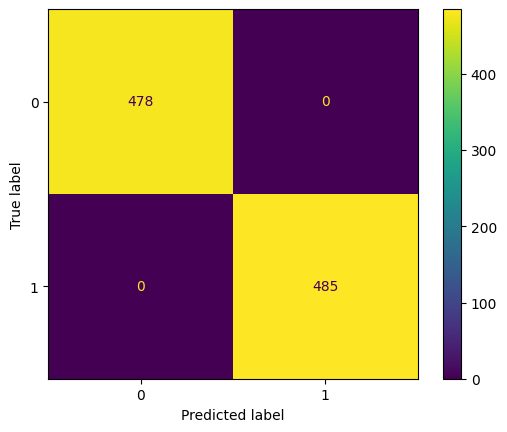

In [439]:
matrix = ConfusionMatrixDisplay(confusion_matrix=conf_matrix)
matrix.plot()

- TN = 478
- FN = 0
- TP = 485
- FP = 0

### Feature Importance

In [471]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X2_train, y_train)
importances = pd.DataFrame(data={
    'Attribute': X2_train.columns,
    'Importance': model.coef_[0]
})
importances = importances.sort_values(by='Importance', ascending=False)

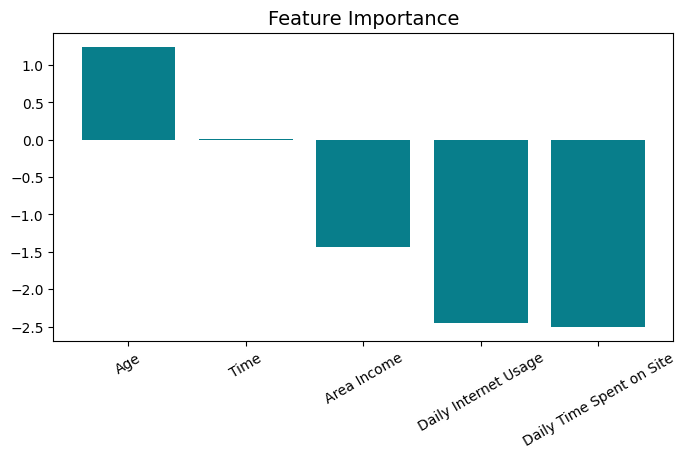

In [485]:
plt.figure(figsize=(8,4))
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature Importance', size=14)
plt.xticks(rotation=30)
plt.show()

**HASIL OBSERVASI**

Berdasarkan output di atas, dapat disimpulkan bahwa feature importance yang paling berpengaruh pada target adalah `Daily Time Spent on Site`. Fitur ini memiliki korelasi negatif terhadap target. Jadi, semakin lama waktu mengakses website, maka customer tersebut tidak mengklik ads.

### Rekomendasi Bisnis

1. Pelanggan dengan `Daily Time Spent on Site` dan `Daily Internet Usage` yang tinggi memiliki peluang lebih besar untuk mengklik ads.
2. Meningkatkan kenyamanan dan kemudahan dalam mengakses situs, misalnya dengan menampilkan ads berupa promosi barang/jasa yang diminati customer tersebut.
3. Memberikan tampilan ads yang lebih menarik dan mengikuti perkembangan tren masa kini, terutama bagi customer yang berumur lebih muda.
4. Memasang ads pada situs-situs yang sering diakses, seperti Facebook, YouTube, dan Instagram.

## Business Simulation

### Cost & Revenue

- "The average cost-per-click (CPC) in AdWords across all industries is $2.32 on the search network." (https://www.wordstream.com/cpc)
- Untuk memudahkan, diasumsikan biaya per ads adalah $3.
- Asumsikan revenue per ads adalah $10.

In [494]:
# Cek banyaknya customer yg klik (1) dan tidak (0) sebelum adanya machine learning
df['Clicked on Ad'].value_counts()

No     500
Yes    500
Name: Clicked on Ad, dtype: int64

In [517]:
# Cost dan revenue sebelum adanya machine learning
click = 500  
not_click = 500 

cost_ads = 3
revenue_ads = 10

cost_before = (click + not_click) * cost_ads
revenue_before = click * revenue_ads

print('Cost sebelum machine learning : $',cost_before)
print('Revenue sebelum machine learning : $',revenue_before)

Cost sebelum machine learning : $ 3000
Revenue sebelum machine learning : $ 5000


In [518]:
# Cost dan revenue setelah adanya machine learning
TP = 485  
FP = 0

cost_after = (TP + FP) * cost_ads
revenue_after = TP * revenue_ads

print('Cost setelah machine learning : $',cost_after)
print('Revenue setelah machine learning : $',revenue_after)

Cost setelah machine learning : $ 1455
Revenue setelah machine learning : $ 4850


### Profit

In [519]:
# Profit sebelum adanya machine learning
profit_before = revenue_before - cost_before

# Profit setelah adanya machine learning
profit_after = revenue_after - cost_after

print('Profit sebelum machine learning : $',profit_before)
print('Profit setelah machine learning : $',profit_after)

Profit sebelum machine learning : $ 2000
Profit setelah machine learning : $ 3395


In [520]:
percentage_profit = ((profit_after-profit_before)/profit_before) * 100
print('Persentase kanaikan profit :',percentage_profit,'%')

Persentase kanaikan profit : 69.75 %
